In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

## READING DATA

In [5]:
df = pd.read_csv("../coordinates.csv")    # reading csv file

In [6]:
df.head()   # printing first 5

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Right,0.541391,0.501497,-0.654536,0.999978,0.573378,0.453368,-0.602188,0.999941,0.587363,...,0.881988,0.000004,0.599284,2.882658,-0.028874,0.000007,0.419446,2.898352,0.280218,0.000013
1,Right,0.545108,0.501740,-0.695316,0.999978,0.575799,0.453481,-0.642734,0.999942,0.589593,...,0.746355,0.000004,0.573525,2.895416,-0.026874,0.000007,0.388750,2.900701,0.134351,0.000012
2,Right,0.546721,0.501722,-0.652919,0.999978,0.577359,0.453394,-0.604621,0.999942,0.591226,...,0.657040,0.000004,0.575982,2.905305,-0.071035,0.000007,0.392190,2.903677,0.052515,0.000012
3,Right,0.547428,0.501716,-0.655682,0.999978,0.578027,0.453324,-0.606043,0.999943,0.591962,...,0.732689,0.000004,0.577842,2.913689,-0.060310,0.000007,0.393885,2.914009,0.128632,0.000013
4,Right,0.548146,0.501718,-0.656426,0.999976,0.578500,0.453160,-0.607194,0.999938,0.592492,...,0.664190,0.000005,0.577243,2.919188,-0.000150,0.000007,0.395148,2.916894,0.057247,0.000013


# FEATURES VS TARGET
### TARGET IS WHAT WE ARE TRYING TO PREDICT (YOGA POSE)
### FEATURES ARE INFO USED TO PREDICT TARGET ( COORDINATES )

In [7]:
x=df.drop(['class'], axis=1)   # features
y=df['class']   # target values

In [8]:
print(x)

           x1        y1        z1        v1        x2        y2        z2  \
0    0.541391  0.501497 -0.654536  0.999978  0.573378  0.453368 -0.602188   
1    0.545108  0.501740 -0.695316  0.999978  0.575799  0.453481 -0.642734   
2    0.546721  0.501722 -0.652919  0.999978  0.577359  0.453394 -0.604621   
3    0.547428  0.501716 -0.655682  0.999978  0.578027  0.453324 -0.606043   
4    0.548146  0.501718 -0.656426  0.999976  0.578500  0.453160 -0.607194   
..        ...       ...       ...       ...       ...       ...       ...   
394  0.488998  0.626199 -0.897800  0.999981  0.514210  0.564044 -0.823133   
395  0.488984  0.626108 -0.877625  0.999982  0.514215  0.563648 -0.800329   
396  0.488972  0.626114 -0.874782  0.999982  0.514159  0.563657 -0.798068   
397  0.489244  0.626129 -0.890970  0.999982  0.514271  0.563660 -0.815796   
398  0.486625  0.625752 -0.891916  0.999982  0.512588  0.562362 -0.817768   

           v2        x3        y3  ...       z31       v31       x32  \
0  

In [9]:
print(y)

0      Right
1      Right
2      Right
3      Right
4      Right
       ...  
394     Both
395     Both
396     Both
397     Both
398     Both
Name: class, Length: 399, dtype: object


## SPLITTING DATA INTO TRAINING DATA AND TESTING DATA

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1234)

In [11]:
print(X_train)

           x1        y1        z1        v1        x2        y2        z2  \
146  0.431786  0.567656 -0.919260  0.999957  0.458902  0.514673 -0.851256   
42   0.582599  0.529756 -0.761369  0.999964  0.607544  0.475693 -0.703047   
0    0.541391  0.501497 -0.654536  0.999978  0.573378  0.453368 -0.602188   
193  0.315359  0.589337 -0.818330  0.999951  0.353727  0.528122 -0.767504   
371  0.483650  0.618770 -0.844380  0.999986  0.508958  0.555344 -0.769019   
..        ...       ...       ...       ...       ...       ...       ...   
204  0.319849  0.585984 -0.991647  0.999978  0.357490  0.520675 -0.937915   
53   0.580446  0.527070 -0.715376  0.999965  0.606871  0.472269 -0.659104   
294  0.477626  0.610206 -0.808107  0.999993  0.504822  0.551223 -0.727979   
211  0.322726  0.587405 -0.935857  0.999985  0.359285  0.521488 -0.880735   
303  0.480365  0.615241 -0.765507  0.999991  0.505337  0.555274 -0.688009   

           v2        x3        y3  ...       z31       v31       x32  \
146

In [12]:
print(y_train)

146     Left
42     Right
0      Right
193     Left
371     Both
       ...  
204     Left
53     Right
294     Both
211     Left
303     Both
Name: class, Length: 279, dtype: object


In [45]:
print(X_test)

           x1        y1        z1        v1        x2        y2        z2  \
5    0.576338  0.343217 -0.410654  0.999963  0.591403  0.312304 -0.379553   
43   0.554810  0.349283 -0.295778  0.999975  0.567491  0.317797 -0.252401   
6    0.574931  0.343101 -0.398220  0.999966  0.590395  0.312557 -0.365816   
83   0.593500  0.396506 -0.460905  0.999108  0.612057  0.358080 -0.461222   
122  0.586695  0.372949 -0.390638  0.999766  0.605563  0.340290 -0.382028   
..        ...       ...       ...       ...       ...       ...       ...   
203  0.588124  0.401190 -0.756192  0.999591  0.604706  0.360195 -0.748764   
108  0.581141  0.374710 -0.480289  0.999774  0.599006  0.329676 -0.469658   
99   0.578840  0.372883 -0.393651  0.999519  0.597883  0.331192 -0.362167   
184  0.543701  0.362474 -0.271206  0.999830  0.552006  0.334485 -0.244392   
27   0.590139  0.345055 -0.474955  0.999968  0.606840  0.311562 -0.443330   

           v2        x3        y3  ...       z31       v31       x32  \
5  

In [13]:
print(y_test)

40     Right
44     Right
260     Left
188     Left
320     Both
       ...  
167     Left
220     Left
283     Both
225     Left
266     Left
Name: class, Length: 120, dtype: object


# TRAINING THE MODEL AND SAVING THE BEST CLASSIFIER

## A FUNCTION WHICH FITS GIVEN CLASSIFIER ON TRAINING AND TESTING DATA , PRINTS EVALUATION AND RETURNS MODEL & ACCURACY

In [14]:
def train_and_evaluate_classifier(X_train, X_test, y_train, y_test, clf):
    model = make_pipeline(StandardScaler(), clf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Set zero_division to 1
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Metrics for {clf.__class__.__name__}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}")

    return model, accuracy, clf.__class__.__name__

## FUNCTION TO PLOT CONFUSION MATRIX

In [15]:
def plot_confusion_matrix(model, X_test, y_test, class_labels, clf_name):
    y_pred = model.predict(X_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                                        display_labels=class_labels)
    cm_display.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.show()

In [56]:
def plot_roc_curve_for_all_models(final_models, X_test, y_test, class_labels):
    plt.figure(figsize=(8, 6))

    for model, clf_name in final_models:
        lb = label_binarize(y_test, classes=class_labels) # one hot encoded binary matrix
        n_classes = lb.shape[1] # no. of classes (rows)

        #using OneVsRestClassifier for multi class classifications
        classifier = OneVsRestClassifier(model)

        y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

        # Compute micro-average ROC curve and ROC area
        fpr, tpr, _ = roc_curve(lb.ravel(), y_score.ravel()) #no need of threshold
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve for the model
        plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for All Models')
    plt.legend(loc='lower right')
    plt.savefig("comparison of auc for all roc.jpg")

## FUNCTION TO SAVE MODEL

In [16]:
def save_model(model, filename):
    with open(filename, 'wb') as model_file:
        pickle.dump(model, model_file)
    print(f"The model has been saved as {filename}")

# USING DIFFERENT TYPES OF CLASSIFIERS

In [17]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# TRAINING , COMPARING AND SAVING THE BEST MODEL

Metrics for LogisticRegression:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1 Score: 1.0


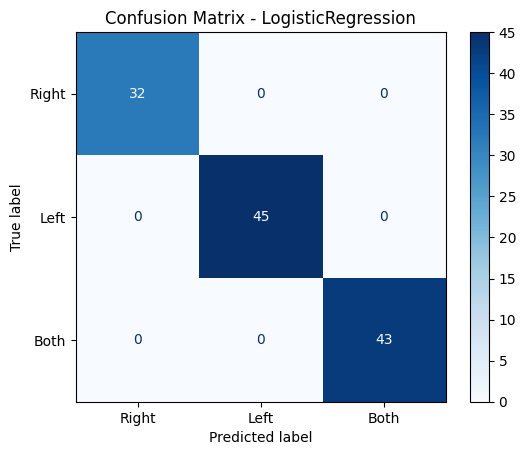

Metrics for RandomForestClassifier:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1 Score: 1.0


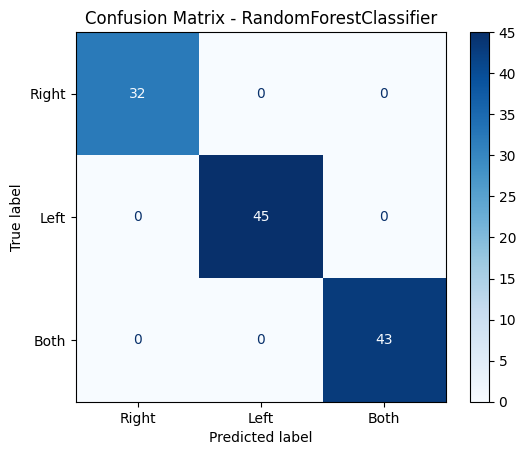

Metrics for GradientBoostingClassifier:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1 Score: 1.0


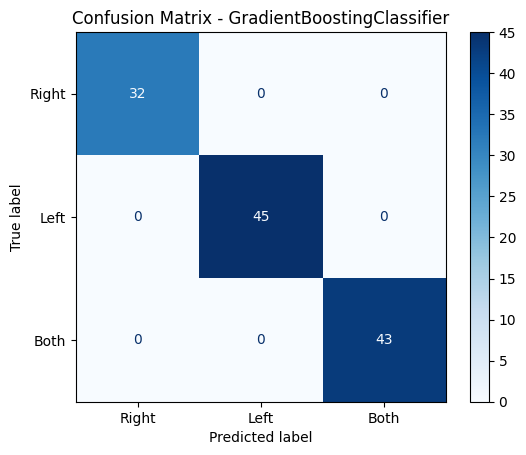


The best model (LogisticRegression) has been selected with accuracy 1.0


In [35]:
best_model = None
best_accuracy = 0.0
best_classifier_name = None
finalModels = []

for clf_name, clf in classifiers.items():
    model, accuracy, classifier_name = train_and_evaluate_classifier(X_train, X_test, y_train, y_test, clf)
    plot_confusion_matrix(model, X_test, y_test, class_labels=df['class'].unique(), clf_name=classifier_name)
    finalModels.append([model,classifier_name])

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_classifier_name = classifier_name

print(f"\nThe best model ({best_classifier_name}) has been selected with accuracy {best_accuracy}")

In [46]:
for i in finalModels:
    print(i[0],"\nName:",i[1],"\n")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())]) 
Name: LogisticRegression 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())]) 
Name: RandomForestClassifier 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())]) 
Name: GradientBoostingClassifier 



In [19]:
print(best_model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])


In [53]:
save_model(best_model, 'best_model.pkl')

The model has been saved as best_model.pkl


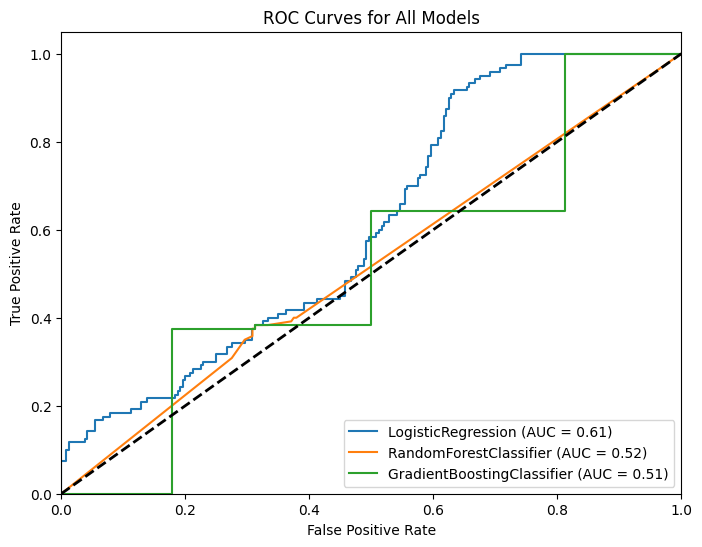

In [57]:
plot_roc_curve_for_all_models(finalModels, X_test, y_test, class_labels=df['class'].unique())